<a href="https://colab.research.google.com/github/yuriarciniegas/empleyoes-mysql-yuri1/blob/main/mercadolibre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

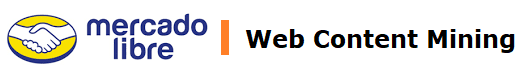

Versión: Octubre 2023


**Step 0: Load Request Libraries**

In [ ]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize

print("========END STEP 0=============")

**Step 1: Load data and transform it into a dataset**

https://developers.mercadolibre.com.co/es_ar/buscador-de-productos

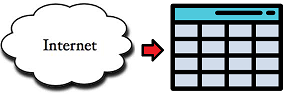

In [ ]:
TARGET = "Celulares"

url = "https://api.mercadolibre.com/sites/MCO/search?q=" + TARGET

response = requests.get(url).json()

df_results = json_normalize(response['results'])

df_results.head()

In [ ]:
df_results.to_excel("productos.xlsx")

**Step 2: Download and show image**

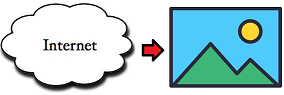

In [ ]:
from skimage import io
import matplotlib.pyplot as plt

image = io.imread(df_results['thumbnail'][8])
plt.imshow(image)
plt.show()

**Step 3: Data Analytics**

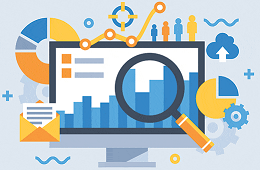

Step 3A: Price histogram

In [ ]:
ax = df_results[['price']].plot.hist(bins=12, alpha=0.5, )

Step 3B: Sellers by zone: table

In [ ]:
df_results.groupby(['seller_address.city.name']).count()['id']

Step 3C: Sellers by zone: pie chart

In [ ]:
df_results.groupby(['seller_address.city.name']).count()['id'].plot.pie(y='seller_address.city.name', figsize = (5,5))

**Step 5A: Wordcloud**

In [ ]:
###################GENERATE WORD CLOUD#########################################
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

#Frequent words used in spanish
stop_words = set(stopwords.words('spanish'))
stop_words = stop_words.union(set(['las', 'los']))

#Obtain all responses
try:
  text = " ".join(str(resp) for resp in df_results.title)
except Exception as e:
  print(e)
  pass

text = text.lower()

#Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=500, height=500).generate(text)

#Display the generated image
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


**Consulte el API de Falabella:**

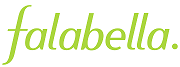

https://developers.falabella.com/